<a href="https://colab.research.google.com/github/EmanSalah2000/flood_prediction/blob/main/flood_fuzzy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib .pyplot as plt
import sys


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# values to predict the flood 
CURRENT_RIVER_LEVEL = 4
CURRENT_RAINFALL = 288

In [30]:
# inputs    riverlevel    rainfall
x_riverlevel = np.arange(0, 6, 1)
x_rainfall = np.arange(0, 300, 1)
# output  flood status
x_floodstatus = np.arange(0, 10, 1)

In [31]:
# print("x_riverlevel: " + str(x_riverlevel))
# print("x_rainfall: " + str(x_rainfall))
# print("x_floodstatus"+ str(x_floodstatus))


In [32]:
#generating fuzzy membership value
#river membership value
riverlevel_normal = fuzz.trimf(x_riverlevel, [0,1,2])
# print("riverlevel_normal: " + str(riverlevel_normal))
riverlevel_berjaga = fuzz.trimf(x_riverlevel, [1,2,3])
# print("riverlevel_berjaga: " + str(riverlevel_berjaga))
riverlevel_amaran = fuzz.trimf(x_riverlevel, [2,3,4])
# print("riverlevel_amaran: " + str(riverlevel_amaran))
riverlevel_bahaya = fuzz.trimf(x_riverlevel, [3,4,5])
# print("riverlevel_bahaya: " + str(riverlevel_bahaya))

In [33]:
#rainfall membership value
rainfall_low = fuzz.trimf(x_rainfall, [0, 30, 61])
# print("rainfall_low: " + str(rainfall_low))
rainfall_moderate = fuzz.trimf(x_rainfall, [40, 122, 183])
# print("rainfall_moderate: " + str(rainfall_moderate))
rainfall_high = fuzz.trimf(x_rainfall, [160, 200, 300])
# print("rainfall_high: " + str(rainfall_high))

In [34]:
#floodstatus using trapezoidal mf
flood_none = fuzz.trapmf(x_floodstatus, [0, 1, 2, 3])
# print("flood_none: " + str(flood_none))
flood_minor = fuzz.trapmf(x_floodstatus, [1, 3, 4, 5])
# print("flood_minor: " + str(flood_minor))
flood_moderate = fuzz.trimf(x_floodstatus, [4, 5, 6])
# print("flood_moderate: " + str(flood_moderate))
flood_major = fuzz.trapmf(x_floodstatus, [5.5, 6, 7, 9])
# print("flood_major: " + str(flood_major))

(0.0, 5.0, 0.0, 1.0)

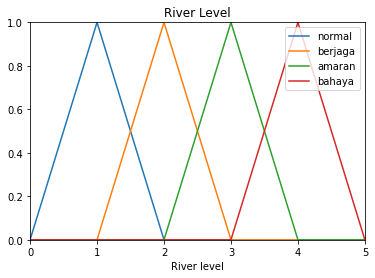

In [35]:
#River level
fig, ax = plt.subplots()
ax.set_title('River Level')
ax.set_xlabel('River level')
ax.plot(x_riverlevel, riverlevel_normal,linewidth=1.5, label='normal')
ax.plot(x_riverlevel, riverlevel_berjaga,linewidth=1.5, label='berjaga')
ax.plot(x_riverlevel, riverlevel_amaran,linewidth=1.5, label='amaran')
ax.plot(x_riverlevel, riverlevel_bahaya,linewidth=1.5, label='bahaya')
ax.legend()
plt.axis([0, 5, 0, 1])
#plt.show()

(0.0, 300.0, 0.0, 1.0)

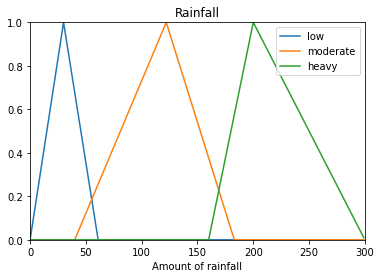

In [36]:
#Rainfall
fig, ax = plt.subplots()
ax.set_title('Rainfall')
ax.set_xlabel('Amount of rainfall')
ax.plot(x_rainfall, rainfall_low, linewidth=1.5, label='low')
ax.plot(x_rainfall, rainfall_moderate, linewidth=1.5, label='moderate')
ax.plot(x_rainfall, rainfall_high, linewidth=1.5, label='heavy')
ax.legend()
plt.axis([0, 300, 0, 1])
#plt.show()

(0.0, 10.0, 0.0, 1.0)

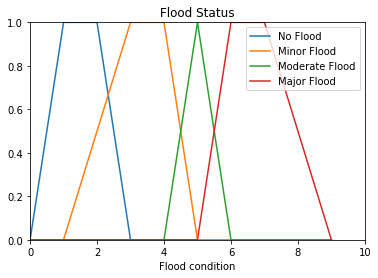

In [37]:
#Flood Status
fig, ax = plt.subplots()
ax.set_title('Flood Status')
ax.set_xlabel('Flood condition')
ax.plot(x_floodstatus, flood_none, linewidth=1.5, label='No Flood')
ax.plot(x_floodstatus, flood_minor, linewidth=1.5, label='Minor Flood')
ax.plot(x_floodstatus, flood_moderate, linewidth=1.5, label='Moderate Flood')
ax.plot(x_floodstatus, flood_major, linewidth=1.5, label='Major Flood')
"""ax.plot(x_floodstatus, flood_extreme, linewidth=1.5, label='Extreme Flood')"""
ax.legend()
plt.axis([0, 10, 0, 1])
#plt.show()

In [38]:
#checking the value for the membership function river level
river_level_norm = fuzz.interp_membership(x_riverlevel, riverlevel_normal, CURRENT_RIVER_LEVEL)
print("river_level_norm: " + str(river_level_norm))
river_level_berjaga = fuzz.interp_membership(x_riverlevel, riverlevel_berjaga, CURRENT_RIVER_LEVEL)
print("river_level_berjaga: " + str(river_level_berjaga))
river_level_amaran = fuzz.interp_membership(x_riverlevel, riverlevel_amaran, CURRENT_RIVER_LEVEL)
print("river_level_amaran: " + str(river_level_amaran))
river_level_bahaya = fuzz.interp_membership(x_riverlevel, riverlevel_bahaya, CURRENT_RIVER_LEVEL)
print("river_level_bahaya: " + str(river_level_bahaya))

river_level_norm: 0.0
river_level_berjaga: 0.0
river_level_amaran: 0.0
river_level_bahaya: 1.0


In [39]:
#checking the value for the membership function rainfall
rainfall_low = fuzz.interp_membership(x_rainfall, rainfall_low, CURRENT_RAINFALL)
print("rainfall_low: " + str(rainfall_low))
rainfall_moderate = fuzz.interp_membership(x_rainfall, rainfall_moderate, CURRENT_RAINFALL)
print("rainfall_moderate: " + str(rainfall_moderate))
rainfall_high = fuzz.interp_membership(x_rainfall, rainfall_high, CURRENT_RAINFALL)
print("rainfall_high: " + str(rainfall_high))

rainfall_low: 0.0
rainfall_moderate: 0.0
rainfall_high: 0.12


In [40]:
results = dict()

In [41]:
#rules evaluation

#in min-max algorithm, fmin is equivalent to AND, fmax is equivalent to OR

######################################################################################################
#Rule 1 no flood -> river level normal
active_flood_none = np.fmin(river_level_norm, flood_none)
print("\nFlood None: " + str(active_flood_none))
#####################################################################################################
#Rule 2 minor flood -> rainfall moderate + river level berjaga || normal
combined_river_level1 = np.fmax(river_level_berjaga, river_level_norm) # level normal OR berjaga
combined_attrib = np.fmin(rainfall_moderate, combined_river_level1) # AND moderate rainfall
active_flood_minor = np.fmin(combined_attrib, flood_minor)
print("\nFlood Minor: " + str(active_flood_minor))
####################################################################################################
#Rule 3 moderate flood -> rainfall moderate + river level berjaga || amaran
combined_river_level3 = np.fmax(river_level_berjaga, river_level_amaran) # level normal OR berjaga
combined_attrib2 = np.fmin(rainfall_moderate, combined_river_level3) # AND moderate rainfall
active_flood_moderate = np.fmin(rainfall_moderate, flood_moderate)
print("\nFlood Moderate: " + str(active_flood_moderate))
######################################################################################################
#Rule 4 major flood -> rainfall high + river level amaran || bahaya                     
combined_river_level2 = np.fmax(river_level_amaran, river_level_bahaya) # level normal OR berjaga
combined_attrib3 = np.fmin(rainfall_high, combined_river_level2) # AND moderate rainfall
active_flood_major = np.fmin(combined_attrib3, flood_major)
print("\nFlood Major: " + str(active_flood_major))


Flood None: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Flood Minor: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Flood Moderate: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Flood Major: [0.   0.   0.   0.   0.   0.   0.12 0.12 0.12 0.  ]


In [42]:
#Rules aggregation
aggregated = np.fmax(active_flood_none, np.fmax(active_flood_minor, np.fmax(active_flood_moderate, active_flood_major)))
print("\nAggregated Value: " + str(aggregated))


Aggregated Value: [0.   0.   0.   0.   0.   0.   0.12 0.12 0.12 0.  ]


In [43]:
#using bisector
#flood_stats2 = fuzz.defuzz(x_floodstatus, aggregated, 'bisector')
#using mean of max
#flood_stats3 = fuzz.defuzz(x_floodstatus, aggregated, 'som')
#using max of maximum
#flood_stats4 = fuzz.defuzz(x_floodstatus, aggregated, 'lom')
#calculating defuzzified value
#using centroid method
flood_stats = fuzz.defuzz(x_floodstatus, aggregated, 'centroid')
print("\nFlood Status: " + str(flood_stats))
plt.show()


Flood Status: 7.0


In [56]:
print(flood_stats)

7.0


In [61]:
if flood_stats <=2:
        print("#############")
        print("No Flood. Check River Level")
elif flood_stats <=4:
    if flood_stats >2:
        print("#############")
        print("Minor Flood might happen. Check river level for high tides")
elif flood_stats <=6:
    if flood_stats >4:
        print("#############")
        print("Moderate flood. Prepare for evacuation.")
elif flood_stats <=9:
    if flood_stats >6:
        print("#############")
        print("Major flood. Code Red. Evacuation is a must")

#############
Major flood. Code Red. Evacuation is a must
